In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-1/Zomato data .csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('/kaggle/input/zomato-1/Zomato data .csv')

In [4]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
def datahandle(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(datahandle)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


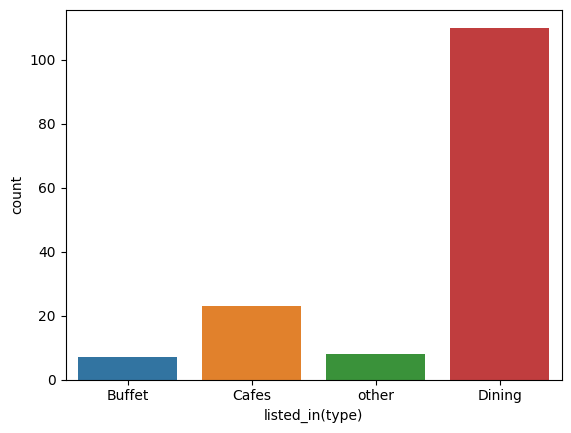

In [6]:
#What type of restaurant do the majority of customers order from?

sns.countplot(x=df['listed_in(type)'])
plt.show()

Text(0.5, 1.0, 'Votes on type of restaurant')

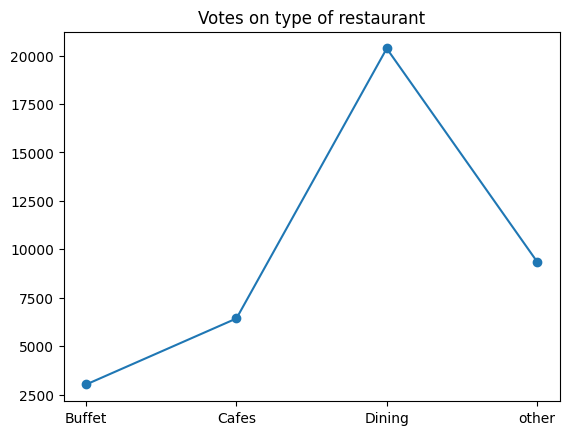

In [7]:
# How many votes has each type of restaurant received from customers?

gd = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': gd})
result
plt.plot(result, marker='o')
plt.title('Votes on type of restaurant')


In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


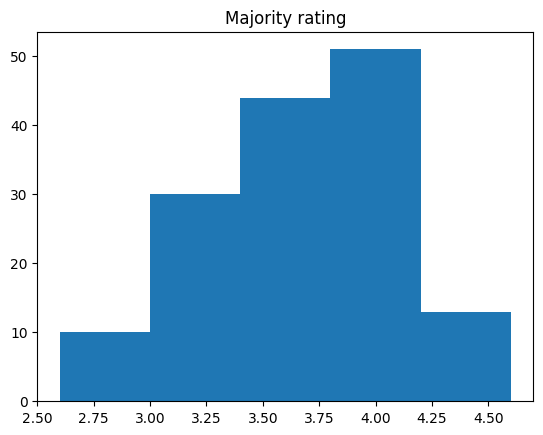

In [9]:
#What are the ratings that the majority of restaurants have received?

plt.hist(df['rate'], bins=5)
plt.title('Majority rating')
plt.show()

Text(0.5, 1.0, 'Average spending')

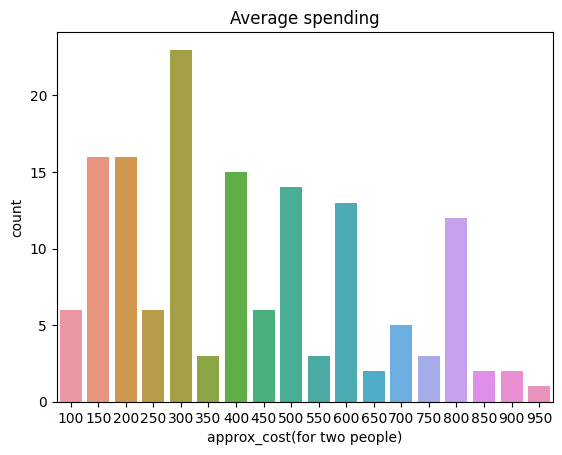

In [10]:
#Zomato has observed that most couples order most of their food online. What is their average spending on each order?

couple_spend = df['approx_cost(for two people)']
sns.countplot(x=couple_spend)
plt.title('Average spending')

Text(0.5, 1.0, 'Heatmap')

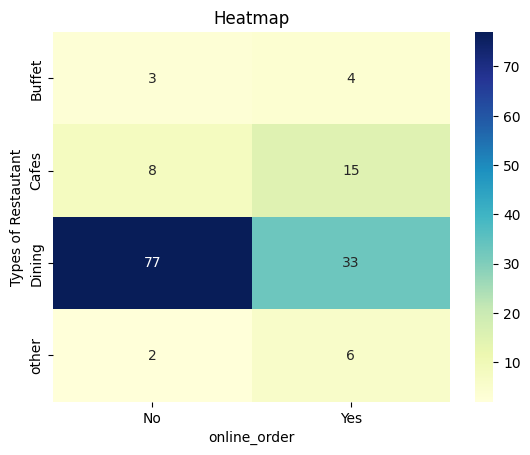

In [11]:
#Which type of restaurant received more offline orders, so that Zomato can provide 
#those customers with some good offers?

pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt='d')
plt.ylabel('Types of Restautant')
plt.title('Heatmap')